# Ensemble Technique
# 11/11/2020

In [42]:
# Required datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Used for ensembling
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
import pydotplus
import graphviz
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score , precision_score,recall_score

In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA (Exploratory Data Analysis)

In [3]:
data.shape

(45211, 17)

In [4]:
# type of each features

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
# Lets convert the dtypes to the object
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [6]:
# convert to the ctategory features

data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
data.dtypes.to_frame('Datatypes of attributes').T #for datatypes of attributes
# data[['job','marital' ,' education' ,'defalut' ,'housing' ,"loan" ,'contact','month' ,'poutcome' , 'Target']]=


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [7]:
# finding the missing values 

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
# check whether the data is balanced or not

data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [10]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

# Five Point Summary

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Outliers are present in the age , balance , campaign , previous , pdays

C:\Users\BHUBESH\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


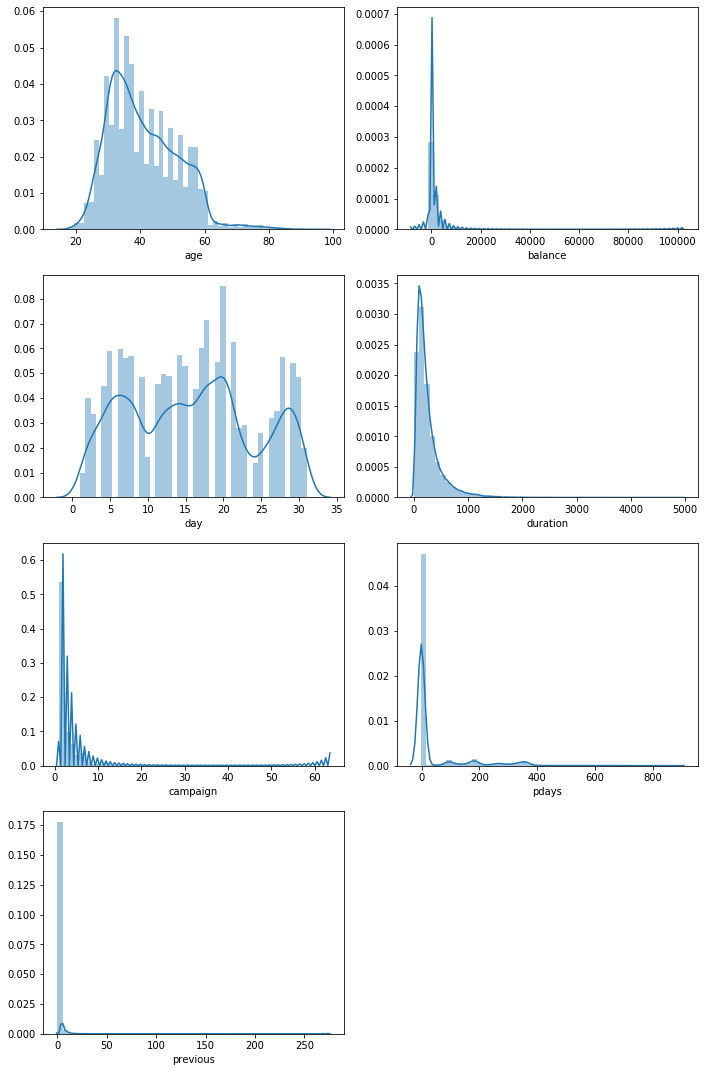

In [13]:
# Skewness .. asymmetric distribution of dataset.. 

# Distributions of numerical colums

fig , axe = plt.subplots(nrows= 4 , ncols = 2 , figsize=(10 , 15))
axe = axe.flatten()
sns.distplot(data['age'] , ax = axe[0])
sns.distplot(data['balance'] , ax = axe[1])
sns.distplot(data['day'] , ax = axe[2])
sns.distplot(data['duration'] , ax = axe[3])
sns.distplot(data['campaign'] , ax = axe[4])
sns.distplot(data['pdays'] , ax = axe[5])
sns.distplot(data['previous'] , ax = axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

### Distributions of Categorical feature

IndexError: index 8 is out of bounds for axis 0 with size 8

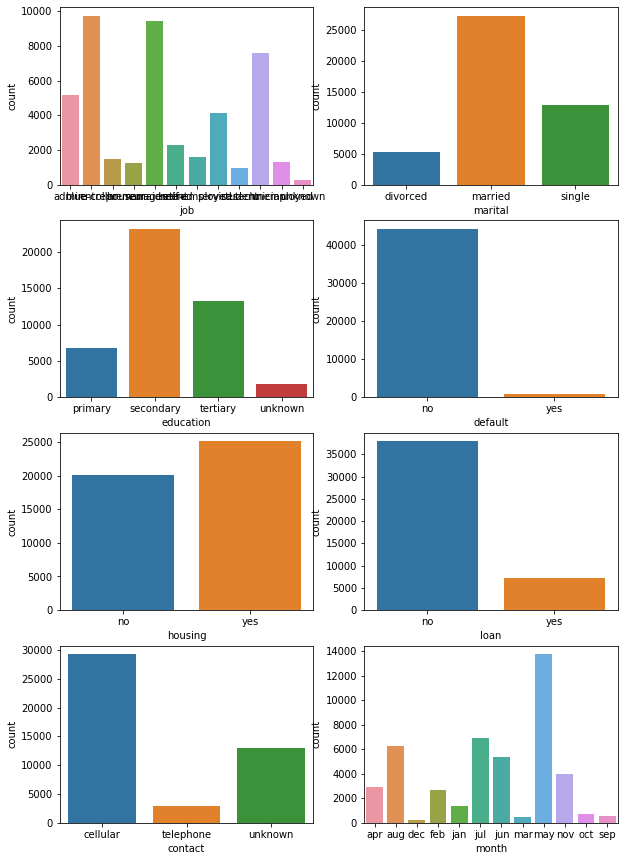

In [14]:
fig , axe = plt.subplots(nrows= 4 , ncols = 2 , figsize=(10 , 15))
axe = axe.flatten()

plt = sns.countplot(x = data['job'],data = data ,ax =axe[0])
# plt.setp(plot.get_xticklabels(), rotation=90)

sns.countplot(x = data['marital'] , data = data , ax = axe[1])
sns.countplot(x = data['education'] , data = data , ax = axe[2])
sns.countplot(x = data['default'] , data = data , ax = axe[3])
sns.countplot(x = data['housing'] , data = data , ax = axe[4])
sns.countplot(x = data['loan'] , data = data , ax = axe[5])
sns.countplot(x = data['contact'] , data = data , ax = axe[6])
sns.countplot(x = data['month'] , data = data , ax = axe[7])
sns.countplot(x = data['poutcome'] , data = data , ax = axe[8])
sns.countplot(x = data['Target'] , data = data , ax = axe[9])
fig.tight_layout()
fig.show()

In [ ]:
# inferences from the count plot of categorical feature!!
# more than 90% customers haee no default credit;

# most custoers have been contacted by may month , 
# most of the customers have been contacted by cellular network
#  no of customers who have housing loan is more than the no of customer who ont have housing loan 
# around 6 customers havecredit in default;

# Measure of skewness of numerical features

In [15]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# checking the presence of outliers

C:\Users\BHUBESH\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


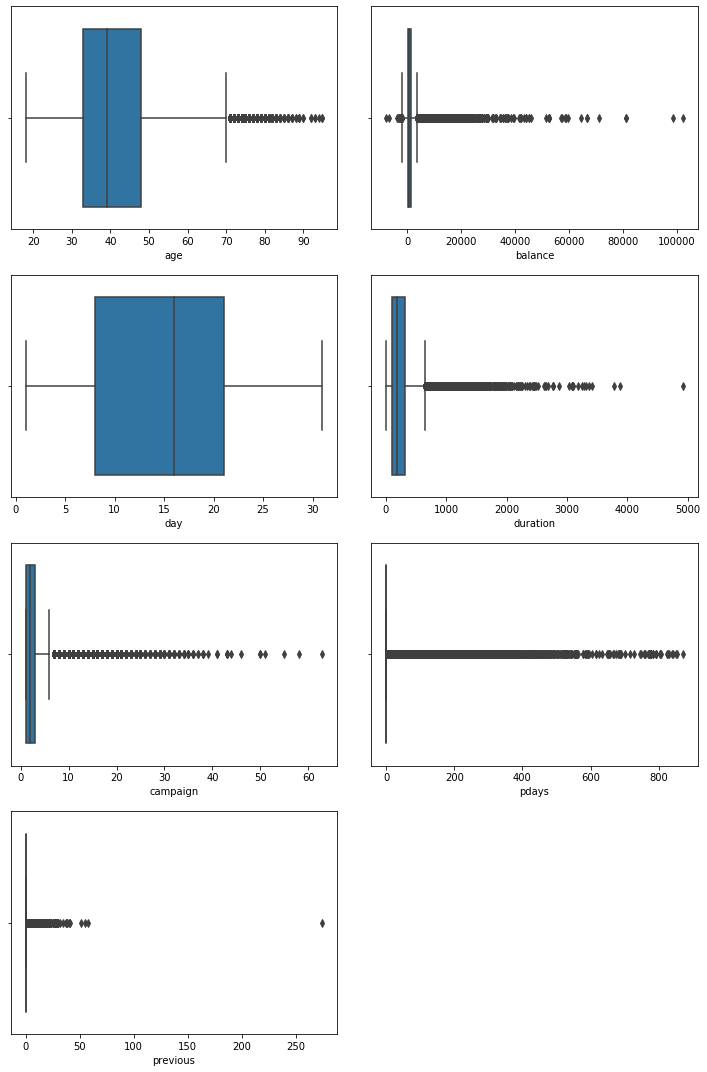

In [49]:
fig , axe = plt.subplots(nrows= 4 , ncols = 2 , figsize=(10 , 15))
axe = axe.flatten()

sns.boxplot(x = 'age' , data = data , ax = axe[0])
sns.boxplot(x = 'balance' , data = data , ax = axe[1])
sns.boxplot(x = 'day' , data = data , ax = axe[2])
sns.boxplot(x = 'duration' , data = data , ax = axe[3])
sns.boxplot(x = 'campaign' , data = data , ax = axe[4])
sns.boxplot(x = 'pdays' , data = data , ax = axe[5])
sns.boxplot(x = 'previous' , data = data , ax = axe[6])
# sns.boxplot(x = 'age' , data = data , ax = axe[7])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [17]:
data['Target'].value_counts().to_frame(' Target Feature distribution')

,Target Feature distribution
no,39922
yes,5289


In [18]:
# converting it into the nuerical values using the label encoder
df = data.copy()
encoder = LabelEncoder()
df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int)
df['loan'] = encoder.fit_transform(df['loan']).astype(int)
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [20]:
# convert to the ctategory features

df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
df.dtypes.to_frame('Datatypes of attributes').T #for datatypes of attributes
# data[['job','marital' ,' education' ,'defalut' ,'housing' ,"loan" ,'contact','month' ,'poutcome' , 'Target']]=


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Handling outliers with mean replacement

In [21]:
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'] ,75),meanbal , df['balance'])

In [22]:
meandur = float(df['balance'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'] ,75),meanbal , df['duration'])

In [23]:
meancam = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'] ,75),meanbal , df['campaign'])

In [24]:
meancam = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'] ,75),meanbal , df['pdays'])

In [25]:
meancam = float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'] ,75),meanbal , df['previous'])

# After Removing the Outliers

C:\Users\BHUBESH\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


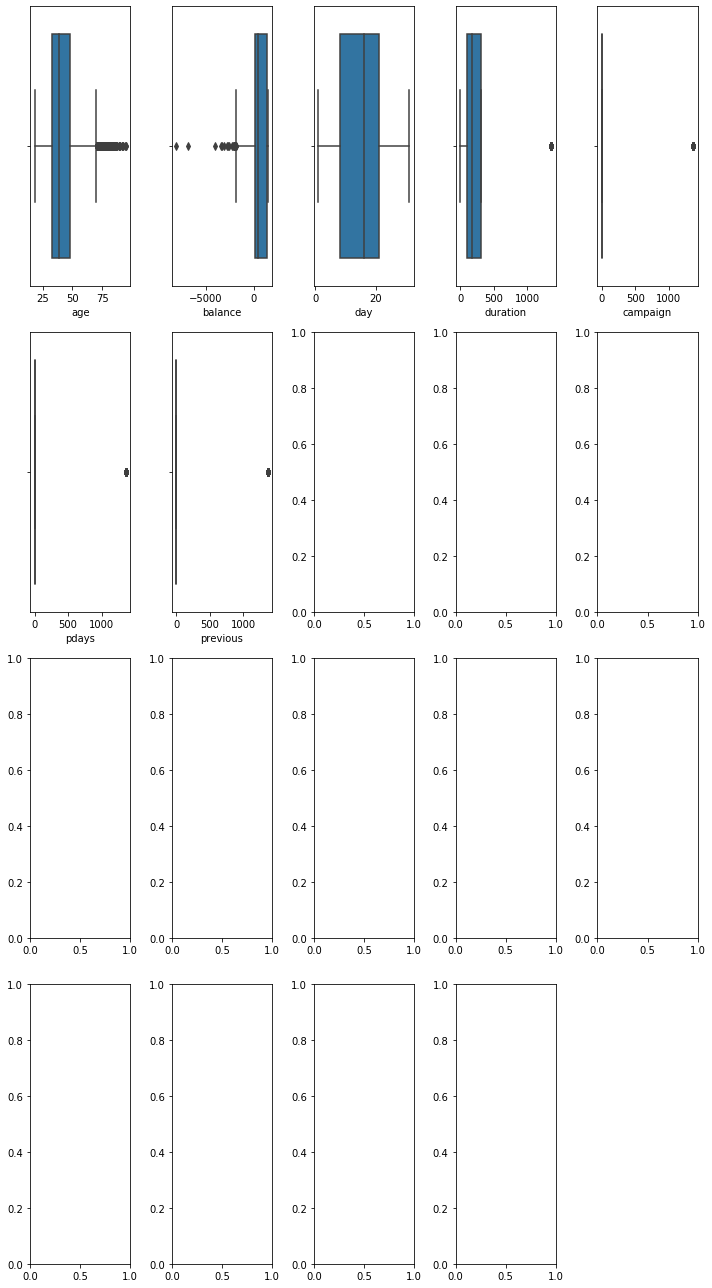

In [48]:
fig , axe = plt.subplots(nrows= 4 , ncols = 5 , figsize=(10 , 18))
axe = axe.flatten()
sns.boxplot(df['age'] , data =df ,ax = axe[0])
sns.boxplot(df['balance'] ,data =df , ax = axe[1])
sns.boxplot(df['day'] ,data =df , ax = axe[2])
sns.boxplot(df['duration'] ,data =df , ax = axe[3])
sns.boxplot(df['campaign'] ,data =df , ax = axe[4])
sns.boxplot(df['pdays'] ,data =df , ax = axe[5])
sns.boxplot(df['previous'] ,data =df , ax = axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# corr Plot of All Features

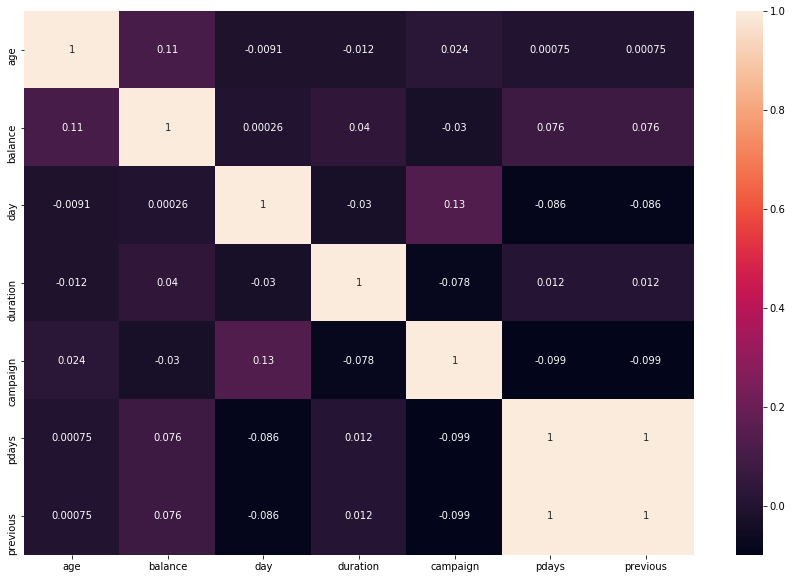

In [44]:
plt.figure(figsize=(15,10)) #for adjusting figuresize
sns.heatmap(df.corr(),annot=True) #for correlation plot

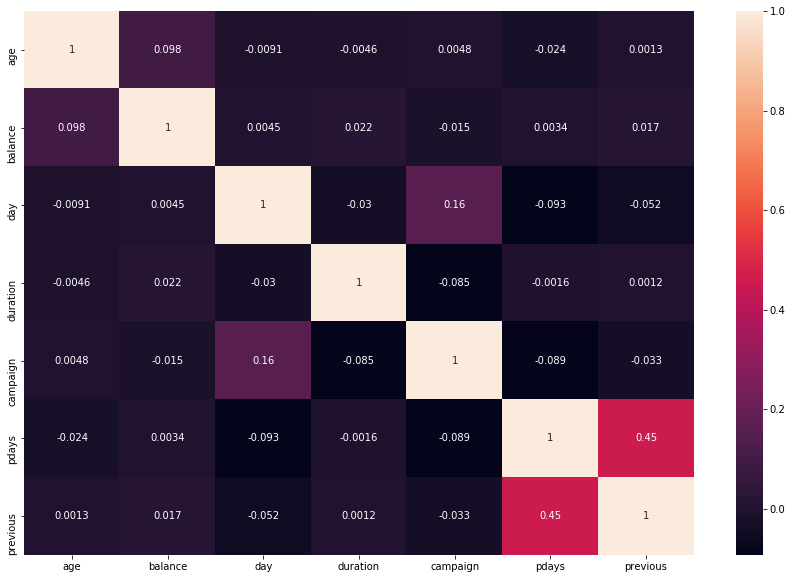

In [50]:
plt.figure(figsize=(15,10)) #for adjusting figuresize
sns.heatmap(data.corr(),annot=True) #for correlation plot

In [52]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [53]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [58]:
df2= df.drop(['job' , 'education' , 'contact' , 'duration' , 'pdays' ,'day','month'],axis =1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# pairplot of the Features

In [59]:
sns.pairplot(df2)

Error in callback <function flush_figures at 0x000000B36FA51950> (for post_execute):


KeyboardInterrupt: 

# Lets Split the data for trainig and Testing Dataset

In [70]:
X = df2.drop('Target' , axis = 1)
y = df2['Target']

In [71]:
X.head(1)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3


In [72]:
y.head(1)

0    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [73]:
# Train the data in 70:30 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [77]:
# Lets scale the data

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(X_train)
xtest_scaled = scaler.fit_transform(X_test)

# Logistic Regression models

In [82]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,y_train)
y_pred = logic_r.predict(xtest_scaled)
Lr_acc = accuracy_score(y_test , y_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test , y_pred))
print('Accuracy Score\n' , Lr_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test , y_pred) )

Confusion Matrix 
 [[11903   110]
 [ 1309   242]]
Accuracy Score
 89.53848422294308

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.69      0.16      0.25      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564



# Naive Bayes

In [84]:
Nb = GaussianNB()
Nb.fit(xtrain_scaled , y_train)
y_pred = Nb.predict(xtest_scaled)
Nb_acc = accuracy_score(y_test , y_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test , y_pred))
print('Accuracy Score\n' , Nb_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test , y_pred) )

Confusion Matrix 
 [[10691  1322]
 [ 1022   529]]
Accuracy Score
 82.71896195812445

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.34      0.31      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.62      0.61     13564
weighted avg       0.84      0.83      0.83     13564



# KNN Model


In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled , y_train)
y_pred = knn.predict(xtest_scaled)

KNN_acc = accuracy_score(y_test , y_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test , y_pred))
print('Accuracy Score\n' , KNN_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test , y_pred) )

Confusion Matrix 
 [[11490   523]
 [ 1217   334]]
Accuracy Score
 87.17192568563846

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.39      0.22      0.28      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.60     13564
weighted avg       0.85      0.87      0.86     13564



# SVC Model

In [87]:
svc = SVC()
svc.fit(xtrain_scaled , y_train)
y_pred1 = svc.predict(xtest_scaled ) 

svc_acc = accuracy_score(y_test , y_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test , y_pred1))
print('Accuracy Score\n' , svc_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, y_pred1))

Confusion Matrix 
 [[11869   144]
 [ 1268   283]]
Accuracy Score
 87.17192568563846

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



In [91]:
# Decision Tree

dtree = DecisionTreeClassifier(criterion='gini' , random_state=1)
dtree.fit(xtrain_scaled , y_train)
dt_pred = dtree.predict(xtest_scaled)

Dt_acc = accuracy_score(y_test , dt_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test , dt_pred))
print('Accuracy Score\n' , Dt_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, dt_pred))

Confusion Matrix 
 [[10985  1028]
 [ 1218   333]]
Accuracy Score
 83.44146269537009

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     12013
           1       0.24      0.21      0.23      1551

    accuracy                           0.83     13564
   macro avg       0.57      0.56      0.57     13564
weighted avg       0.83      0.83      0.83     13564



# Feature importance tst for Decision Tree

In [98]:
xvar = df2.drop('Target' , axis=1)
feature_cols = xvar.columns
feat_importance = dtree.tree_.compute_feature_importances(normalize = False)
feat_imp_dict = dict(zip(feature_cols , dtree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict , orient='index')
feat_imp.sort_values(by=0 , ascending=False)

,0
balance,0.437026
age,0.250546
poutcome,0.094663
campaign,0.081906
marital,0.045808
previous,0.034347
loan,0.028533
housing,0.022706
default,0.004465


# Bagging Ensemble Model

In [102]:
bag = BaggingClassifier(base_estimator=dtree , n_estimators=500 , random_state=1)
bag.fit(xtrain_scaled , y_train)
bag_pred = bag.predict(xtest_scaled)

bag_acc = accuracy_score(y_test , bag_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test ,bag_pred))
print('Accuracy Score\n' , bag_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, bag_pred))

Confusion Matrix 
 [[11618   395]
 [ 1229   322]]
Accuracy Score
 88.02713063992923

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Adaptive Boosting Ensemble Technique

In [105]:
adab = AdaBoostClassifier(n_estimators=50 , random_state=1)
adab.fit(X_train , y_train)

ada_pred = adab.predict(X_test)

adab_acc = accuracy_score(y_test , ada_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test ,ada_pred))
print('Accuracy Score\n' , adab_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, ada_pred))

Confusion Matrix 
 [[11895   118]
 [ 1309   242]]
Accuracy Score
 89.47950457092303

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.67      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Gradient Boosting

In [108]:
grad = GradientBoostingClassifier(n_estimators=100 , random_state=1)
grad.fit(X_train , y_train)

grad_pred = grad.predict(X_test)

grad_acc = accuracy_score(y_test , grad_pred)
print('Confusion Matrix \n' ,confusion_matrix(y_test ,grad_pred))
print('Accuracy Score\n' , grad_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, grad_pred))

Confusion Matrix 
 [[11888   125]
 [ 1308   243]]
Accuracy Score
 89.43526983190799

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [ ]:
# Random Forest

In [107]:
randf = RandomForestClassifier(n_estimators=100 , random_state=2 , max_features=3)
randf.fit(X_train , y_train)

ran_pred = randf.predict(X_test)
randf_acc = accuracy_score(y_test , ran_pred)

print('Confusion Matrix \n' ,confusion_matrix(y_test ,ran_pred))
print('Accuracy Score\n' , randf_acc*100)
print ('\n Classification Report \n \n', classification_report(y_test, ran_pred))

Confusion Matrix 
 [[11587   426]
 [ 1222   329]]
Accuracy Score
 87.85019168386906

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.44      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Model with Accuracy Scores

In [113]:
scores = [ ('Naive Bayes ' , Nb_acc),
         ('KNN' , KNN_acc),
         ('logistic Regression' ,Lr_acc),
         ('SVC' , svc_acc),
         ('Decision Tree' , Dt_acc),
         ('Bagging', bag_acc) ,
         ('Adaptive', adab_acc),
         ('Gradient Boosting' ,grad_acc) ,
           ('Random Forest' ,randf_acc)]
scores = pd.DataFrame(scores , columns = ['Model1' , 'Accuracy Score'])

print("\033[1m'' Current Scores with Outliers replaced with mean:] ")
scores.sort_values(by='Accuracy Score' ,ascending = False)

'' Current Scores with Outliers replaced with mean:] 


,Model1,Accuracy Score
2,logistic Regression,0.895385
6,Adaptive,0.894795
7,Gradient Boosting,0.894353
5,Bagging,0.880271
8,Random Forest,0.878502
1,KNN,0.871719
3,SVC,0.871719
4,Decision Tree,0.834415
0,Naive Bayes,0.827190


# Conclusion
The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.
The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.
Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
This situation could have been avoided if the datset was balanced.
Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

In [ ]:
Thanks => LetsUpgrade

In [ ]:
copyright 